In [ ]:
"""

PROJRCT TITLE :

BUILDING HIGHLY SCALEABL;E MODEL  PREDICTING PCOS

"""

In [ ]:
Roles :

1. understand , analyze and interpret large datasets
2. develope advance programs to extract data needed and prepare data for further analysis

In [ ]:
what actually the project is pcos ?

irregular infreq prolong menstural cycle

70 women undiag

estrogen progestron  androgens

fsh lsh ovaluation control


cyst dangerous
hight level male hormones
skiiped menstrula cyckles


In [ ]:
right patient at roight place

match giorl/women wiith rigt product

pcos > treatement
no >>relive immediatedluy

insighlts

In [ ]:
import numpy as np
import pandas as pd
import os

import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier,plot_tree

In [ ]:
df = pd.read_excel("/content/PCOS DATA.xlsx")
df.head(10)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
5,6,6,0,36,74.1,165.0,27.217631,15,78,28,...,0,0.0,0,110,70,9,6,16.0,20.0,8.0
6,7,7,0,34,64.0,156.0,26.298488,11,72,18,...,0,0.0,0,120,80,6,6,15.0,16.0,6.8
7,8,8,0,33,58.5,159.0,23.139907,13,72,20,...,0,0.0,0,120,80,7,6,15.0,18.0,7.1
8,9,9,0,32,40.0,158.0,16.023073,11,72,18,...,0,0.0,0,120,80,5,7,17.0,17.0,4.2
9,10,10,0,36,52.0,150.0,23.111111,15,80,20,...,0,0.0,0,110,80,1,1,14.0,17.0,2.5


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [ ]:
df.isna().sum()

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

In [ ]:
column_names = {}

for i in df.columns:
  column_names[i] = i.strip().replace(" ","_")


df.rename(columns = column_names,inplace = True )

In [ ]:
df.columns

Index(['Sl._No', 'Patient_File_No.', 'PCOS_(Y/N)', 'Age_(yrs)', 'Weight_(Kg)',
       'Height(Cm)', 'BMI', 'Blood_Group', 'Pulse_rate(bpm)',
       'RR_(breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle_length(days)',
       'Marraige_Status_(Yrs)', 'Pregnant(Y/N)', 'No._of_aborptions',
       'I___beta-HCG(mIU/mL)', 'II____beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip_Ratio',
       'TSH_(mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit_D3_(ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight_gain(Y/N)', 'hair_growth(Y/N)',
       'Skin_darkening_(Y/N)', 'Hair_loss(Y/N)', 'Pimples(Y/N)',
       'Fast_food_(Y/N)', 'Reg.Exercise(Y/N)', 'BP__Systolic_(mmHg)',
       'BP__Diastolic_(mmHg)', 'Follicle_No._(L)', 'Follicle_No._(R)',
       'Avg._F_size_(L)_(mm)', 'Avg._F_size_(R)_(mm)', 'Endometrium_(mm)'],
      dtype='object')

In [ ]:
df['PCOS_(Y/N)'].value_counts()

0    363
1    176
Name: PCOS_(Y/N), dtype: int64

In [ ]:
! pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 59.2 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv

report = sv.analyze(df)

report.show_html("eda_repost.html")

                                             |          | [  0%]   00:00 -> (? left)

Report eda_repost.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
df.columns

Index(['Sl._No', 'Patient_File_No.', 'PCOS_(Y/N)', 'Age_(yrs)', 'Weight_(Kg)',
       'Height(Cm)', 'BMI', 'Blood_Group', 'Pulse_rate(bpm)',
       'RR_(breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle_length(days)',
       'Marraige_Status_(Yrs)', 'Pregnant(Y/N)', 'No._of_aborptions',
       'I___beta-HCG(mIU/mL)', 'II____beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip_Ratio',
       'TSH_(mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit_D3_(ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight_gain(Y/N)', 'hair_growth(Y/N)',
       'Skin_darkening_(Y/N)', 'Hair_loss(Y/N)', 'Pimples(Y/N)',
       'Fast_food_(Y/N)', 'Reg.Exercise(Y/N)', 'BP__Systolic_(mmHg)',
       'BP__Diastolic_(mmHg)', 'Follicle_No._(L)', 'Follicle_No._(R)',
       'Avg._F_size_(L)_(mm)', 'Avg._F_size_(R)_(mm)', 'Endometrium_(mm)'],
      dtype='object')

In [ ]:
x = df.drop(['Sl._No', 'Patient_File_No.', 'PCOS_(Y/N)'],axis = 1)
y = df["PCOS_(Y/N)"]



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                 y,
                                                 random_state = 42,
                                                 test_size = 0.2,
                                                 stratify = y)

In [ ]:
dt_clf = DecisionTreeClassifier()

dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt_clf.score(x_train,y_train)

1.0

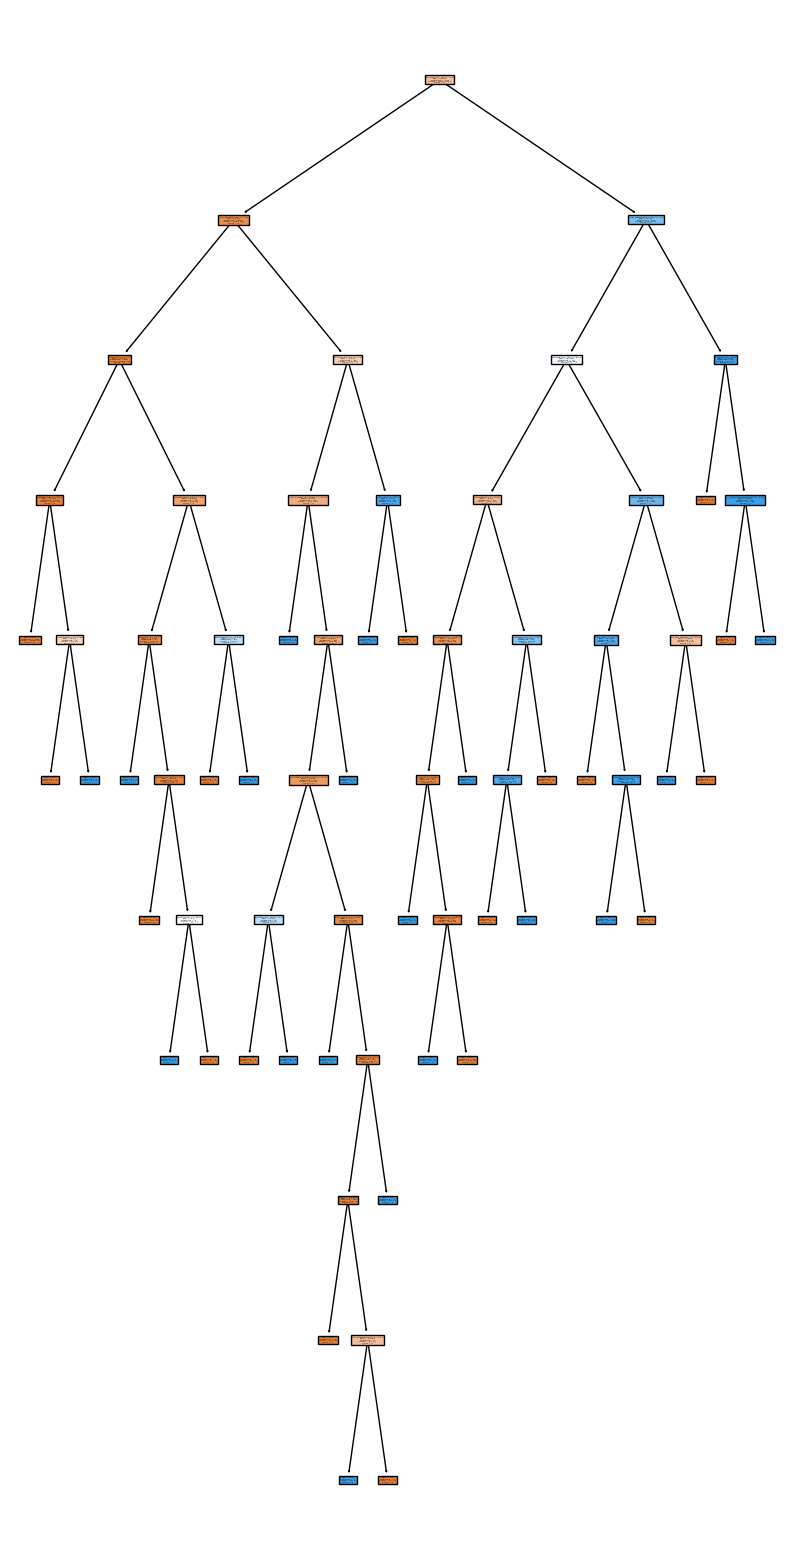

In [ ]:
plt.figure(figsize = (10,20))
tree = plot_tree(dt_clf,feature_names =x.columns, class_names = ["0","1"],filled = True)
plt.savefig("Decision Tree Classifier")

In [ ]:
dt_clf.feature_importances_

array([0.0274755 , 0.00821392, 0.02696214, 0.00316214, 0.        ,
       0.        , 0.00702698, 0.        , 0.01386781, 0.01597042,
       0.01168177, 0.        , 0.        , 0.01039804, 0.        ,
       0.03311625, 0.        , 0.00938433, 0.03889126, 0.00527024,
       0.        , 0.00893603, 0.05588405, 0.        , 0.01405397,
       0.02529714, 0.        , 0.02127509, 0.05202358, 0.0759754 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03466388, 0.48191807, 0.        , 0.01855201,
       0.        ])

<Axes: >

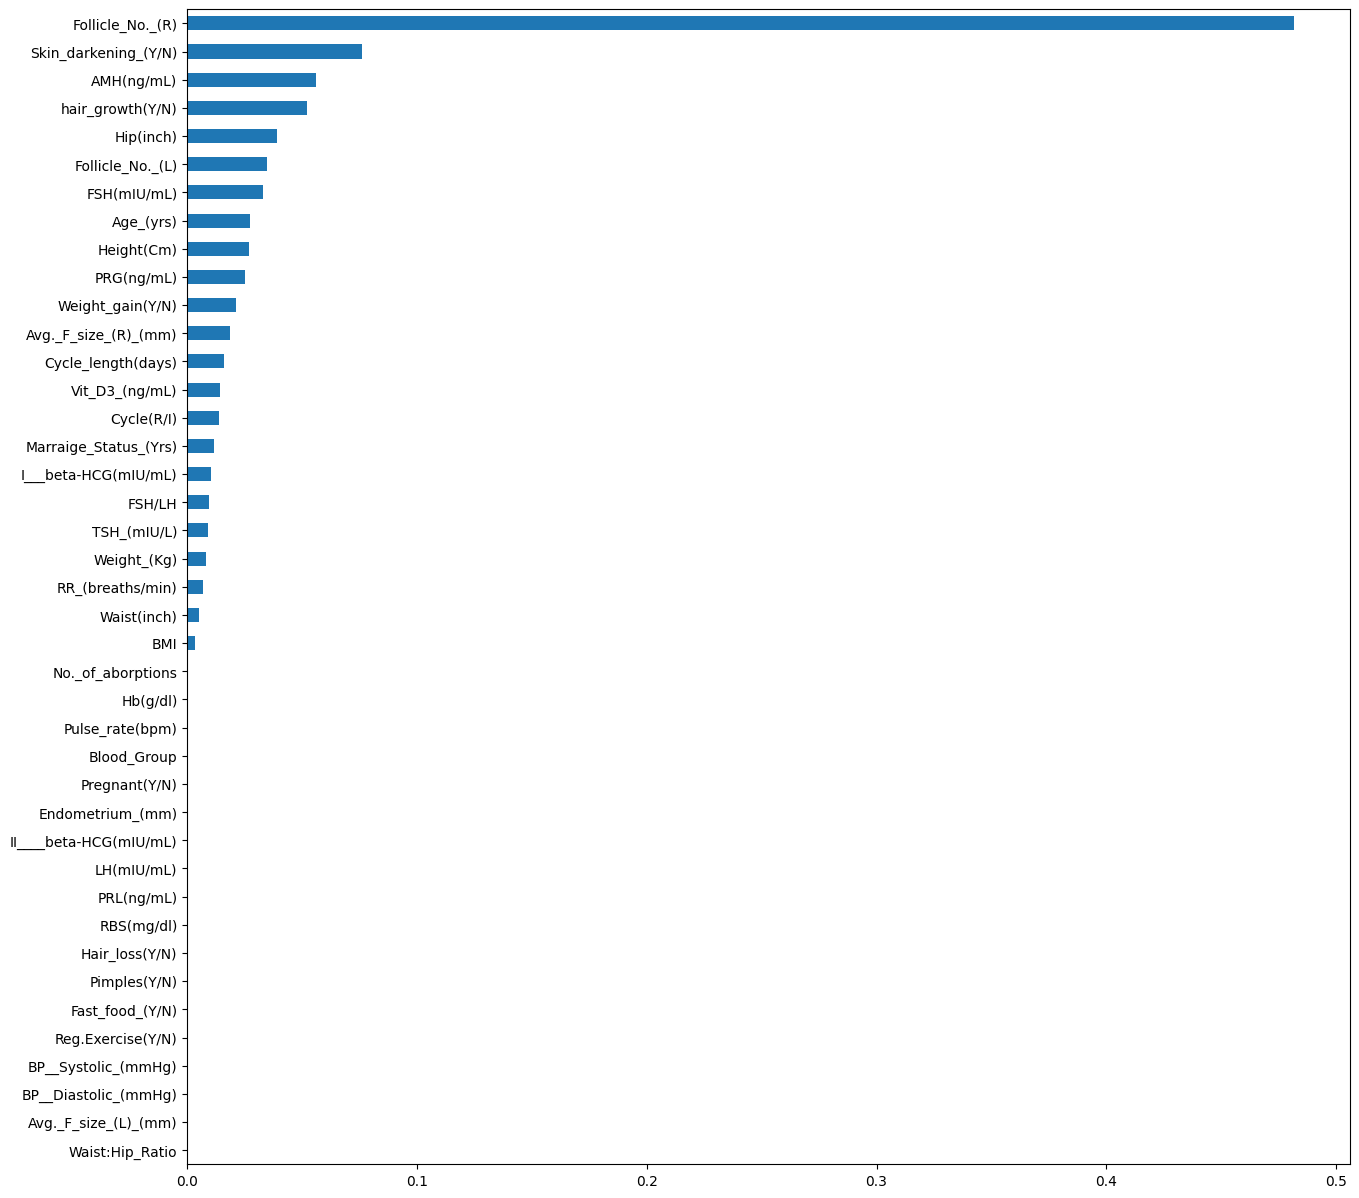

In [ ]:
plt.figure(figsize=(15,15))
s1 = pd.Series(dt_clf.feature_importances_,index = x.columns)
s1.sort_values().plot(kind = "barh")

In [ ]:
df.columns

Index(['Sl._No', 'Patient_File_No.', 'PCOS_(Y/N)', 'Age_(yrs)', 'Weight_(Kg)',
       'Height(Cm)', 'BMI', 'Blood_Group', 'Pulse_rate(bpm)',
       'RR_(breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle_length(days)',
       'Marraige_Status_(Yrs)', 'Pregnant(Y/N)', 'No._of_aborptions',
       'I___beta-HCG(mIU/mL)', 'II____beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip_Ratio',
       'TSH_(mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit_D3_(ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight_gain(Y/N)', 'hair_growth(Y/N)',
       'Skin_darkening_(Y/N)', 'Hair_loss(Y/N)', 'Pimples(Y/N)',
       'Fast_food_(Y/N)', 'Reg.Exercise(Y/N)', 'BP__Systolic_(mmHg)',
       'BP__Diastolic_(mmHg)', 'Follicle_No._(L)', 'Follicle_No._(R)',
       'Avg._F_size_(L)_(mm)', 'Avg._F_size_(R)_(mm)', 'Endometrium_(mm)'],
      dtype='object')

In [ ]:
x = df[["hair_growth(Y/N)",'Follicle_No._(R)','BMI','Avg._F_size_(R)_(mm)','PRL(ng/mL)','Fast_food_(Y/N)','Weight_gain(Y/N)','I___beta-HCG(mIU/mL)','Pulse_rate(bpm)']]

In [ ]:
x

,hair_growth(Y/N),Follicle_No._(R),BMI,Avg._F_size_(R)_(mm),PRL(ng/mL),Fast_food_(Y/N),Weight_gain(Y/N),I___beta-HCG(mIU/mL),Pulse_rate(bpm)
0,0,3,19.300000,18.0,45.16,1.0,0,1.99,78
1,0,5,24.921163,14.0,20.09,0.0,0,60.80,74
2,0,15,25.270891,20.0,10.52,1.0,0,494.08,72
3,0,2,29.674945,14.0,36.90,0.0,0,1.99,72
4,0,4,20.060954,14.0,30.09,0.0,0,801.45,72
...,...,...,...,...,...,...,...,...,...
536,0,0,18.500000,10.0,5.30,0.0,0,1.99,72
537,0,7,25.300000,18.0,21.09,0.0,1,80.13,72
538,0,0,23.400000,9.0,96.41,0.0,0,1.99,74
539,0,6,22.200000,16.0,38.89,0.0,0,292.92,74


In [ ]:
# splitting the data set in train test split

x_train,x_test,y_train,y_test = train_test_split(
                                                x,
                                                y,
                                                train_size = 0.8,
                                                random_state = 42
)

In [ ]:
x_train.shape,y_train.shape,x_test.shape

((431, 9), (431,), (108, 9))

In [ ]:
###scaling the data in order to avoid domination of larger values to smaller values

scaler = StandardScaler()

x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train),columns = x_train.columns)

x_test_scaled = pd.DataFrame(scaler.transform(x_test),columns = x_test.columns)

In [ ]:
x_train_scaled

,hair_growth(Y/N),Follicle_No._(R),BMI,Avg._F_size_(R)_(mm),PRL(ng/mL),Fast_food_(Y/N),Weight_gain(Y/N),I___beta-HCG(mIU/mL),Pulse_rate(bpm)
0,1.564609,-1.292151,-1.637161,0.745347,-0.105331,0.934833,-0.810982,-0.167261,1.223849
1,1.564609,1.629529,-0.816954,0.745347,0.324959,0.934833,-0.810982,-0.086944,-0.316985
2,-0.639137,0.955295,0.048612,1.056893,0.505625,0.934833,-0.810982,7.850584,-0.316985
3,1.564609,2.079018,0.073043,-0.500837,0.101539,0.934833,1.233073,-0.193954,1.737461
4,-0.639137,0.281061,0.146337,0.433801,0.626989,0.934833,-0.810982,-0.129350,-0.316985
...,...,...,...,...,...,...,...,...,...
426,-0.639137,-0.168428,0.599105,-2.993205,1.206226,-1.069710,-0.810982,-0.204297,0.196626
427,1.564609,-0.617917,-0.210973,0.122255,-1.213465,-1.069710,1.233073,-0.207791,-0.316985
428,-0.639137,-0.842662,-0.751789,0.745347,-0.586649,-1.069710,-0.810982,-0.164036,-0.316985
429,-0.639137,-0.617917,-0.733196,-0.812383,0.471837,0.934833,-0.810982,-0.151083,-0.830597


In [ ]:
# Building an architecture

model = tf.keras.Sequential(name = "Main_container")

# adding input layer
model.add(tf.keras.layers.Input(shape = [9],name= "Input_Layer"))

# add hidden layers also
model.add(tf.keras.layers.Dense(units = 9,activation = "elu",kernel_initializer= "he_normal",name = "hidden_layer_1"))

model.add(tf.keras.layers.Dense(units = 8,activation = "elu",kernel_initializer= "he_normal",name = "hidden_layer_2"))

model.add(tf.keras.layers.Dense(units = 4,activation = "elu",kernel_initializer= "he_normal",name = "hidden_layer_3"))

# adding output layer
model.add(tf.keras.layers.Dense(units = 1,activation = "sigmoid",kernel_initializer= "glorot_normal",name = "Output_layer"))

In [ ]:
# once the architecture is been created we add functionality to model

model.compile(
          optimizer = "adam",
          loss = "binary_crossentropy",
          metrics = ["accuracy"]
)

In [ ]:
# now we will be fitting the model

history = model.fit(
                  x_train_scaled,
                  y_train,
                  verbose = True,
                  batch_size = 16,
                  validation_split = 0.2,
                  epochs = 100,
                  workers = 10,
                  use_multiprocessing = True
)

Epoch 1/100
22/22 [==============================] - 7s 16ms/step - loss: 0.8614 - accuracy: 0.5378 - val_loss: 0.7393 - val_accuracy: 0.6322
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 0.7393 - accuracy: 0.5930 - val_loss: 0.6546 - val_accuracy: 0.6437
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6606 - accuracy: 0.6279 - val_loss: 0.6006 - val_accuracy: 0.7126
Epoch 4/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6043 - accuracy: 0.6453 - val_loss: 0.5608 - val_accuracy: 0.7241
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 0.5583 - accuracy: 0.6948 - val_loss: 0.5257 - val_accuracy: 0.7356
Epoch 6/100
22/22 [==============================] - 0s 6ms/step - loss: 0.5198 - accuracy: 0.7151 - val_loss: 0.4939 - val_accuracy: 0.7471
Epoch 7/100
22/22 [==============================] - 0s 5ms/step - loss: 0.4828 - accuracy: 0.7733 - val_loss: 0.4676 - val_accuracy: 0.7816
Epoch 8/100


In [ ]:
def plotting(history,keyword):

  plt.plot(history.history[keyword])
  plt.plot(history.history["val_"+keyword])

  plt.title("model "+ keyword)
  plt.ylabel(keyword)
  plt.xlabel("epoch")

  plt.legend(["training data","validation_data"])


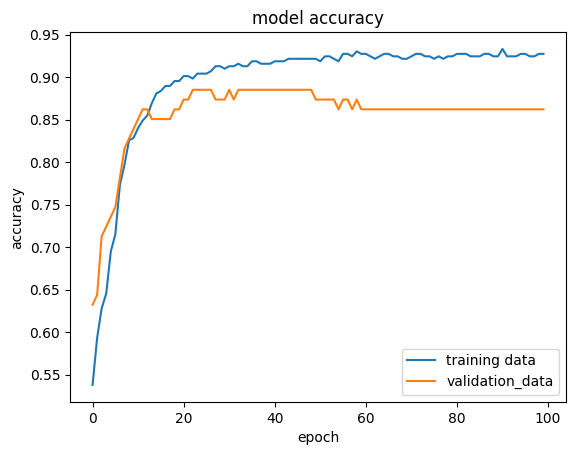

In [ ]:
plotting(history,"accuracy")

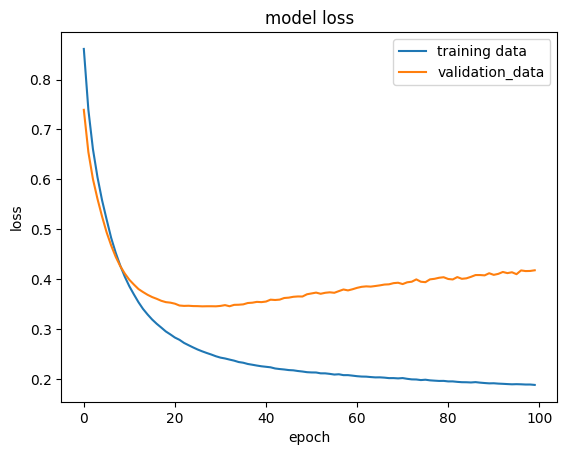

In [ ]:
plotting(history,"loss")

In [ ]:
y_logs = model.predict(x_test_scaled)

y_pred = np.where(y_logs>0.5,1,0)

y_pred[:3]

4/4 [==============================] - 0s 3ms/step


array([[1],
       [0],
       [0]])

In [ ]:
# printing accuracy score

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

acc = accuracy_score(y_test,y_pred)

print("accuracy of given model on testing data is : ",np.round(acc,2))

accuracy of given model on testing data is :  0.88


In [ ]:
clf_report = classification_report(y_test,y_pred)

print(clf_report)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        80
           1       0.80      0.71      0.75        28

    accuracy                           0.88       108
   macro avg       0.85      0.83      0.84       108
weighted avg       0.88      0.88      0.88       108



In [ ]:
cnf = confusion_matrix(y_test,y_pred)

cnf

array([[75,  5],
       [ 8, 20]])

## Conditional Callbacks

In [ ]:
class Conditionalcallback(tf.keras.callbacks.Callback):
  def end_epoch(self,epoch,logs={}):
    if (logs.get("accuracy")>=0.85 and logs.get("val_accuracy")>=0.85):
      self.model.stop_traning = True

In [ ]:
conditional_callback = Conditionalcallback()

In [ ]:
early_stopper = EarlyStopping(
                          monitor = "val_accuracy",
                          min_delta = 0.02,
                          patience = 10,
                          mode= "max",
                          restore_best_weights = True
)

In [ ]:
# Building an architecture

model_2 = tf.keras.Sequential(name = "Main_container")

# adding input layer
model_2.add(tf.keras.layers.Input(shape = [9],name= "Input_Layer"))

# add hidden layers also
model_2.add(tf.keras.layers.Dense(units = 9,activation = "elu",kernel_initializer= "he_normal",name = "hidden_layer_1"))

model_2.add(tf.keras.layers.Dense(units = 8,activation = "elu",kernel_initializer= "he_normal",name = "hidden_layer_2"))

model_2.add(tf.keras.layers.Dense(units = 4,activation = "elu",kernel_initializer= "he_normal",name = "hidden_layer_3"))

# adding output layer
model_2.add(tf.keras.layers.Dense(units = 1,activation = "sigmoid",kernel_initializer= "glorot_normal",name = "Output_layer"))

In [ ]:
# once the architecture is been created we add functionality to model

model_2.compile(
          optimizer = "adam",
          loss = "binary_crossentropy",
          metrics = ["accuracy"]
)

In [ ]:
# now we will be fitting the model

history_2 = model_2.fit(
                  x_train_scaled,
                  y_train,
                  verbose = True,
                  batch_size = 16,
                  validation_data = [x_test_scaled,y_test],
                  callbacks = [conditional_callback,early_stopper],
                  epochs = 100,
                  workers = 10,
                  use_multiprocessing = True
)

Epoch 1/100
27/27 [==============================] - 2s 13ms/step - loss: 0.7879 - accuracy: 0.4965 - val_loss: 0.7946 - val_accuracy: 0.6111
Epoch 2/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6820 - accuracy: 0.6241 - val_loss: 0.6827 - val_accuracy: 0.7037
Epoch 3/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6052 - accuracy: 0.7169 - val_loss: 0.5979 - val_accuracy: 0.7222
Epoch 4/100
27/27 [==============================] - 0s 5ms/step - loss: 0.5439 - accuracy: 0.7958 - val_loss: 0.5251 - val_accuracy: 0.7593
Epoch 5/100
27/27 [==============================] - 0s 5ms/step - loss: 0.4861 - accuracy: 0.8121 - val_loss: 0.4643 - val_accuracy: 0.7963
Epoch 6/100
27/27 [==============================] - 0s 5ms/step - loss: 0.4356 - accuracy: 0.8422 - val_loss: 0.4143 - val_accuracy: 0.8333
Epoch 7/100
27/27 [==============================] - 0s 5ms/step - loss: 0.3953 - accuracy: 0.8492 - val_loss: 0.3830 - val_accuracy: 0.8426
Epoch 8/100


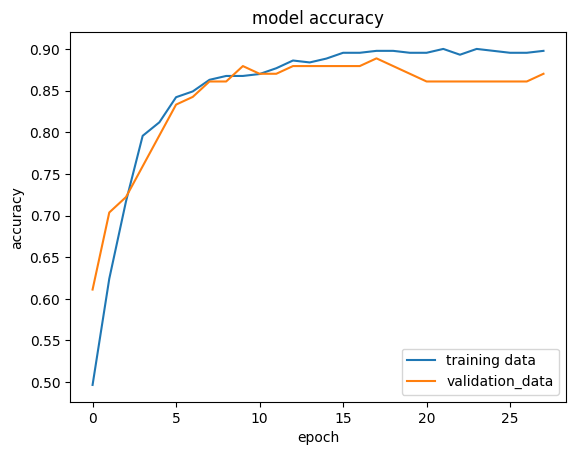

In [ ]:
plotting(history_2,"accuracy")

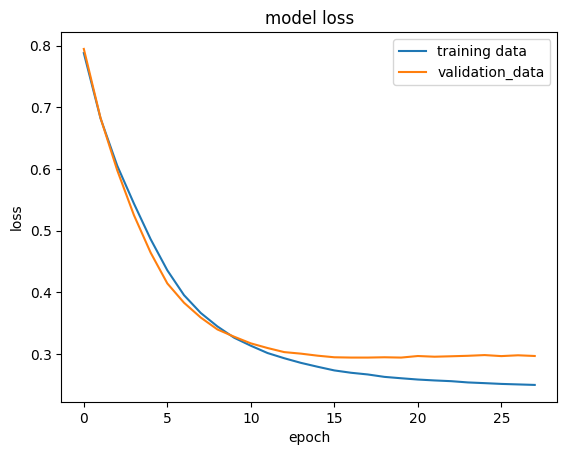

In [ ]:
plotting(history_2,"loss")

#HYPER Parameter Tunning

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 10.1 MB/s eta 0:00:00


In [ ]:
from keras_tuner.tuners import RandomSearch

Using TensorFlow backend


In [ ]:
# Building the hypermodel
def model_maker_hyp(hyp):
    # -------------------------- Building the model
#     Instantiating the sequential container
    model = tf.keras.Sequential()
#     Adding the input layer
    model.add(tf.keras.layers.Input(shape = [9]))

#     Adding the hidden layers
    for num_layer in range(hyp.Int('The optimal number of hidden layers', min_value = 1, max_value = 10, step = 1)):
        model.add(tf.keras.layers.Dense(units = hyp.Int(f'The number of neurons in hidden layer number {num_layer}', min_value = 2, max_value = 16, step = 1),
                                        activation = hyp.Choice(f'The activation function for hidden layer number {num_layer}', ['relu', 'sigmoid', 'elu']),
                                        kernel_initializer = hyp.Choice(f'The kernel initializer for hidden layer number {num_layer}', ['he_normal','he_uniform','glorot_normal','glorot_uniform'])))

#     Adding the output layer
    model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid', kernel_initializer = hyp.Choice('kernel initializer for the output layer', ['he_normal','he_uniform','glorot_normal','glorot_uniform'])))
    # -------------------------- Building the model

    # -------------------------- Compiling the model
    model.compile(optimizer = hyp.Choice('Optimization function',['Adam', 'rmsprop','adagrad','SGD']),
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy', 'Precision', 'Recall'])
    # -------------------------- Compiling the model

    return model

In [ ]:
# creating the tuner object

tuner_obj = RandomSearch(hypermodel = model_maker_hyp,
                         objective = "val_accuracy",
                         max_trials = 10,
                         executions_per_trial = 3)

In [ ]:
tuner_obj.search_space_summary()

Search space summary
Default search space size: 6
The optimal number of hidden layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
The number of neurons in hidden layer number 0 (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 16, 'step': 1, 'sampling': 'linear'}
The activation function for hidden layer number 0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'elu'], 'ordered': False}
The kernel initializer for hidden layer number 0 (Choice)
{'default': 'he_normal', 'conditions': [], 'values': ['he_normal', 'he_uniform', 'glorot_normal', 'glorot_uniform'], 'ordered': False}
kernel initializer for the output layer (Choice)
{'default': 'he_normal', 'conditions': [], 'values': ['he_normal', 'he_uniform', 'glorot_normal', 'glorot_uniform'], 'ordered': False}
Optimization function (Choice)
{'default': 'Adam', 'conditions': [], 'values': ['Adam', 'rmsprop', 'adagrad', 'SGD'], 'or

In [ ]:
tuner_obj.search(x_train_scaled,
                 y_train,
                 epochs = 10,
                 validation_data = [x_test_scaled,y_test],
                 batch_size = 16)

Trial 10 Complete [00h 00m 13s]
val_accuracy: 0.8456790248552958

Best val_accuracy So Far: 0.8734567761421204
Total elapsed time: 00h 02m 51s
